# Introduction to TensorFlow

(by: [Nicolaj Stache](mailto:Nicolaj.Stache@hs-heilbronn.de), Heilbronn University of Applied Sciences, Germany)

---

Version **2.0** greatly simplifies the workflow of creating and computing functions with TensorFlow.
Instead of manually putting abstract syntax trees (graphs) together and compiling them as in version 1.X, TensorFlow 2.0 allows the *eager execution* of functions (as normal Python functions).

For the sake of completeness and the possibility of coming across legacy code the workflow for TensorFlow 1.X is shown along with the updated version. Note that descriptions refering to legacy TensorFlow 1.X code will be written in <font color='darkblue'>blue font</font> and will be separated from the rest of the text by horizontal lines.

<hr>
<font color='darkblue'>In TensorFlow 1.X, the computations require two steps: 

1. __Construct a data flow graph.__ With the graph, we define the actions to be performed with the data, e.g. adding, multiplying, etc. In case of a neural network, the network architecture can be defined in the graph layer by layer. 

2. __Open a session to perform computations.__ Here, we let data (tensors) flow through the graph. The input data is fed in the graph with a so-called feed-dictionary (dictionarys are a data structure supported by Python - you will see this later in the example).
    
</font>
<hr>

Instead of creating a neural network, we start with a simple algebraic graph to convey the ideas behind TensorFlow. The example below shows a flow graph which computes the resulting velocity $v(t)$ of a vehicle, given a start velocity $v_0$, an acceleration $a$ and an acceleration time $t$. The equation for computing $v(t)$ is: $$v(t) = v_0 + a \cdot t.$$ 

Remark: For better convenience, the velocities are given in kilometers per hour (km/h). Hence, $v_0$ must be divided by 3.6 to convert it to the SI-unit meters per second. Finally, the result is multiplied with 3.6 to present the end result again in km/h.

A network graph which resembles the equation is shown below:

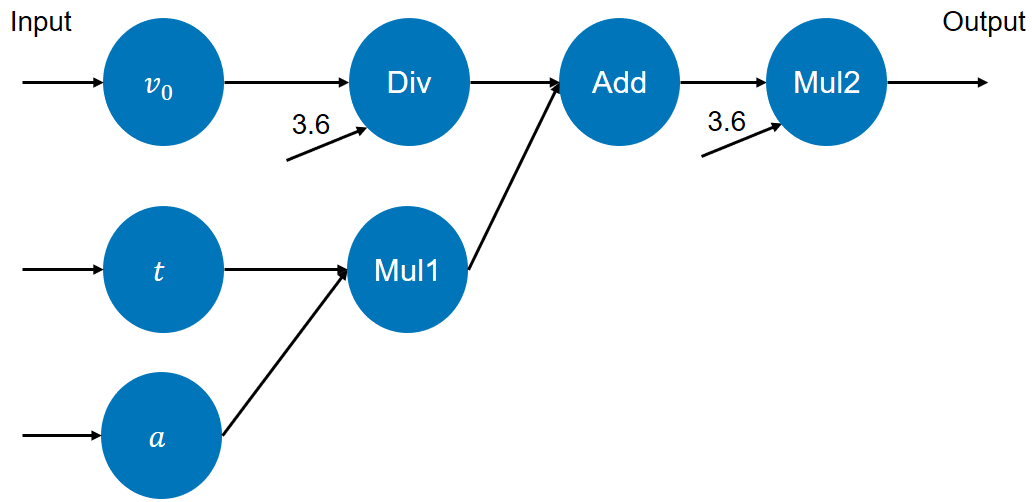

This network shall now be implemented with TensorFlow. It should be able to handle an arbitrary number of input vectors, composed of $[v_0, t, a]$. 

### Import TensorFlow
The first step of our example is to load the tensorflow library and numpy. By importing "`tensorflow as tf`" we can later access TensorFlow commands with the prefix "`tf.`" instead of writing "`tensorflow.`". "`numpy`" is a python library which simplifies vector and matrix algebra. 

In [ ]:
import tensorflow as tf
import numpy as np

We then check the installed TensorFlow version by accessing the "`__version__`" variable of the package. The output should be a number starting with `2`, e.g. `2.1.0`

In [ ]:
tf.__version__

### Create Input Data
Next, we create an array of input data, where the first column (= index 0) corresponds to $v_0$, the second column corresponds to $t$ and the last column to $a$. 

We created 4 entries, feel free to add more. Please also note the way to access single columns in the print statement below.

In [ ]:
data = np.array([[30,  5,  6],
                 [20,  2,  9.81],
                 [ 0, 10,  9.81],
                 [90,  1, -2.5]])
print('Entries referring to a: \n', data[:,2], '\n')

# Hint: in order to preserve the output dimensions, use "None" as shown below : 
print('Column referring to a: \n', data[:,2,None])

<hr>
<font color='darkblue'>
    
### Create Placeholders
Now, we create placeholders to later use them to feed in the input data to the network graph. We need to do this in first place because we can later reference the placeholder's names in the graph.

We need to specify the type and the size of the data. The way of doing so might look somewhat special - but it is due to the concept of tensorflow and becomes clearer later in the computation section. The types of the placeholders are defined as floats with 32 bit. The size is defined to [None, 1] - which can be interpreted as undefined number of rows and 1 column. The use of "None" allows tensorflow to accept different length values during runtime.

</font>
<hr>

In TensorFlow 2.0 you do not need to specify placeholders. However, you can mimic the behavior of TensorFlow 1.X and disable eager execution by making use of the "`compat`" module as shown underneath.

**Important Note:** If you run the legacy code underneath, you might have to restart the kernel later in order to execute the TensorFlow 2.0 code successfully.

> __TODO: Create additional placeholders for $t$ and $a$:__ You may check the placeholder of $v_0$ and use the same coding pattern for your placeholders. If you want to learn more about placeholders, please have a look at the [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/placeholder)

In [ ]:
import tensorflow.compat.v1 as tf_v1
tf_v1.disable_v2_behavior()

In [ ]:
v_0 = tf_v1.placeholder(tf.float32, [None, 1], name="start_velocity")

# TODO: Create additional placeholders for t and a
t = 
a = 

<hr>
<font color='darkblue'>

### Define Network Graph
Next, we create a constant with the value of 3.6 and define the nodes of the network graph, as shown in the figure above.

</font>
<hr>

> __TODO: Create the two missing nodes of the graph!__ Here you need to check which nodes are missing and correctly "connect" the nodes by using the outputs `div_node`, `mul_node_1` and the constant `ms_kmh_const`. The operation for adding has not been used before. Check the syntax for adding in the [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/add).

In [ ]:
ms_kmh_const = tf_v1.constant(3.6, tf.float32, name = 'mskmhconst')

div_node = tf_v1.divide(v_0, ms_kmh_const)
mul_node_1 = tf_v1.multiply(t, a)

# TODO: Create the two remaining nodes of the graph


### Define Tensorflow Function
Instead of defining a function graph manually you can just define a python function and provide it with a `@tf.function` decorator in TensorFlow 2.0. This way the system knows to execute this function using TensorFlow.

In [ ]:
@tf.function
def calculate_velocity(v_0, a, t):
    ms_kmh_const = 3.6

    div_node = v_0 / ms_kmh_const
    mul_node_1 = t * a

    add_node = div_node + mul_node_1
    mul_node_2 = add_node * ms_kmh_const
    return add_node, mul_node_2

<hr>
<font color='darkblue'>

### Computation
Now, the computation is executed in a TensorFlow session by "`with tf.Session() as session:`". Please consider the following:

- "`with tf.Session`" is used to open a session object
- The object is accessible within this code block (= same indentation)
- Leaving the context of the code block, automatically closes the object. (This is convenient, because closing is often missed otherwise.)

- The input data is assigned via a so-called feed dictionary `{v_0: data[:,0,None], t: data[:,1,None], a: data[:,2,None]}`, stating the Python name of the placeholder, e.g. `v_0`, followed by a `:`, followed by the data stream to assign to this placeholder. Since we defined the size to `[None, 1]` the assigned data is just one column of the data-matrix with arbitrary length. 

- In our example we run the session, defining the last node "`mul_node_2`". The used data is given in the feed dictionary. TensorFlow automatically determines by the  flow graph, which operations to be executed to compute this output. You can also run the session for other nodes, e.g. "`add_node`", if you want to get a result in meters per second. 

</font>
<hr> 

> __TODO: Change output to meters per second__ Try to compute the velocity in meters per second. Note: There is no change of the flow graph necessary. 

In [ ]:
# Returns an Op that initializes global variables
init = tf_v1.global_variables_initializer()

# Do not use GPU: otherwise it causes trouble when multiple users are logged-in 
config = tf_v1.ConfigProto(
    device_count = {'GPU' : 0})

# Start session, start the computation
with tf.Session(config=config) as session:
    writer = tf_v1.summary.FileWriter('logdata', session.graph) # just for documentation purposes
    session.run(init) # init variables
    output = session.run(mul_node_2, {v_0: data[:,0,None], t: data[:,1,None], a: data[:,2,None]}) # let tensors flow...
    print('Velocities in km/h: \n', output, '') # print results
       
writer.close()

### Computation
In TensorFlow 2.0 functions can be called just like normal Python functions. The only difference is the output data type. Instead of ordinary floats TensorFlow functions return *tensors*.

In [ ]:
output_ms, output_kmh = calculate_velocity(data[:,0,None], data[:,1,None], data[:,2,None]) # let tensors flow...
print('Velocities in m/s: \n', output_ms, '\n') # print results
print('Velocities in km/h: \n', output_kmh) # print results

### Final Remark
It is obvious that neurons and neural networks can be created like above. Fortunately, TensorFlow offers high-level functions for this, including learning of weights and biases (e.g. by applying gradient descent and backpropagation). Please check out the next tutorial for getting more familiar with this. 